# Section 0: IMPORT LIBARARY

In [31]:
# Import libs
!pip install squarify
import squarify

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Section 1: LOAD DATASET 

In [59]:
customer = pd.read_excel(r"D:\UEL\RFM_US.xlsx")

In [60]:
customer.head(10)

,CustomerID,Recency,Frequency,Monetary
0,18569,357,1,4.99
1,27059,338,1,118.96
2,19897,71,1,596.96
3,27036,334,1,7.28
4,18546,291,1,29.48
5,17003,92,1,2416.45
6,21440,396,1,562.96
7,22768,285,1,600.46
8,15844,127,2,3134.95
9,22791,281,1,600.46


In [61]:
#@title Default title text
print(customer.describe())

         CustomerID      Recency    Frequency       Monetary
count   8210.000000  8210.000000  8210.000000    8210.000000
mean   20702.393910   207.377101     1.466626    7673.275361
std     5588.902938   172.115449     1.346497   48779.629943
min    11012.000000     1.000000     1.000000       1.374000
25%    15882.250000    92.000000     1.000000      44.047500
50%    20539.500000   178.000000     1.000000     148.470000
75%    25623.750000   278.000000     2.000000    2369.970000
max    30118.000000  1123.000000    12.000000  877107.192300


# Section 2: CLUSTERING WITH RFM

## RFM Score

In [63]:
# RFM Score
customer['RecencyScore'] = pd.qcut(customer['Recency'],5,labels=[5,4,3,2,1])
customer['FrequencyScore'] = pd.qcut(customer['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
customer['MonetaryScore'] = pd.qcut(customer['Monetary'],5,labels=[1,2,3,4,5])
customer.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,18569,357,1,4.99,1,1,1
1,27059,338,1,118.96,1,1,3
2,19897,71,1,596.96,5,1,3
3,27036,334,1,7.28,1,1,1
4,18546,291,1,29.48,2,1,1


In [58]:
#calculation of the RFM score
customer["RFM_SCORE"] = customer['RecencyScore'].astype(str) + customer['FrequencyScore'].astype(str) + customer['MonetaryScore'].astype(str)
customer.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_Id,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
0,18569,357,1,4.99,2,1,1,1,111
1,27059,338,1,118.96,2,1,1,3,113
2,19897,71,1,596.96,0,5,1,3,513
3,27036,334,1,7.28,2,1,1,1,111
4,18546,291,1,29.48,2,2,1,1,211


In [38]:
#segmenting of customers according to RecencyScore, FrequencyScore and Monetary values
# Phân các RFM_Score thành các nhóm
seg_map = {
    r'[1-2][1-5][1-3]':'Low value customers and have left the company',
    r'[1-2][1-5][4-5]':'Customers have left the company',
    r'4[1-2][1-4]':'new customer',
    r'5[1-2][5]':'new customer',
    r'4[1-2]5':'Customers spend a lot',
    r'[3-5][1-2][3-4]':'Customers spend a lot',
    r'3[3-5][3-5]':'Customers are at risk of leaving the company',
    r'[4-5]33':'Potential long-term customers',
    r'43[4-5]':'Potential long-term customers',
    r'43[4-5]':'Potential long-term customers',
    r'443':'Potential long-term customers',
    r'53[4-5]':'Potential long-term customers',
    r'543':'Potential long-term customers',
    r'[4-5][4-5][4]':'Loyal customer',
    r'[4-5]45':'Loyal customer',
    r'455':'Loyal customer',
    r'[4-5]53':'Loyal customer',
    r'555':'Best customer ',
    r'[3-5][1-5][1-2]':'General customers'
}

In [67]:
#creation of segment variable
customer['Segment'] = customer['RecencyScore'].astype(str) + customer['FrequencyScore'].astype(str) + customer['MonetaryScore'].astype(str)
customer['Segment'] = customer['Segment'].replace(seg_map, regex=True)
customer.head(10)

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,Segment
0,18569,357,1,4.99,1,1,1,Low value customers and have left the company
1,27059,338,1,118.96,1,1,3,Low value customers and have left the company
2,19897,71,1,596.96,5,1,3,Customers spend a lot
3,27036,334,1,7.28,1,1,1,Low value customers and have left the company
4,18546,291,1,29.48,2,1,1,Low value customers and have left the company
5,17003,92,1,2416.45,4,1,4,new customer
6,21440,396,1,562.96,1,1,3,Low value customers and have left the company
7,22768,285,1,600.46,2,1,3,Low value customers and have left the company
8,15844,127,2,3134.95,4,4,5,Loyal customer
9,22791,281,1,600.46,2,1,3,Low value customers and have left the company


                                              Recency Frequency Monetary      
                                                 mean      mean     mean count
Segment                                                                       
Best customer                                    57.4       4.5  74362.9   191
Customers are at risk of leaving the company    180.1       1.7   3019.9   683
Customers have left the company                 430.8       1.6  10471.9  1385
Customers spend a lot                           106.5       1.0   1099.6   590
General customers                               111.2       1.1     40.2  1714
Low value customers and have left the company   295.3       1.0    126.4  1880
Loyal customer                                   88.5       3.1  40275.3   758
Potential long-term customers                    79.1       1.1    935.2   449
new customer                                    108.2       1.0    578.8   560


RFM Segmentation Visualization

                                              Recency Frequency Monetary      
                                                 mean      mean     mean count
Segment                                                                       
Best customer                                    57.4       4.5  74362.9   191
Customers are at risk of leaving the company    180.1       1.7   3019.9   683
Customers have left the company                 430.8       1.6  10471.9  1385
Customers spend a lot                           106.5       1.0   1099.6   590
General customers                               111.2       1.1     40.2  1714
Low value customers and have left the company   295.3       1.0    126.4  1880
Loyal customer                                   88.5       3.1  40275.3   758
Potential long-term customers                    79.1       1.1    935.2   449
new customer                                    108.2       1.0    578.8   560


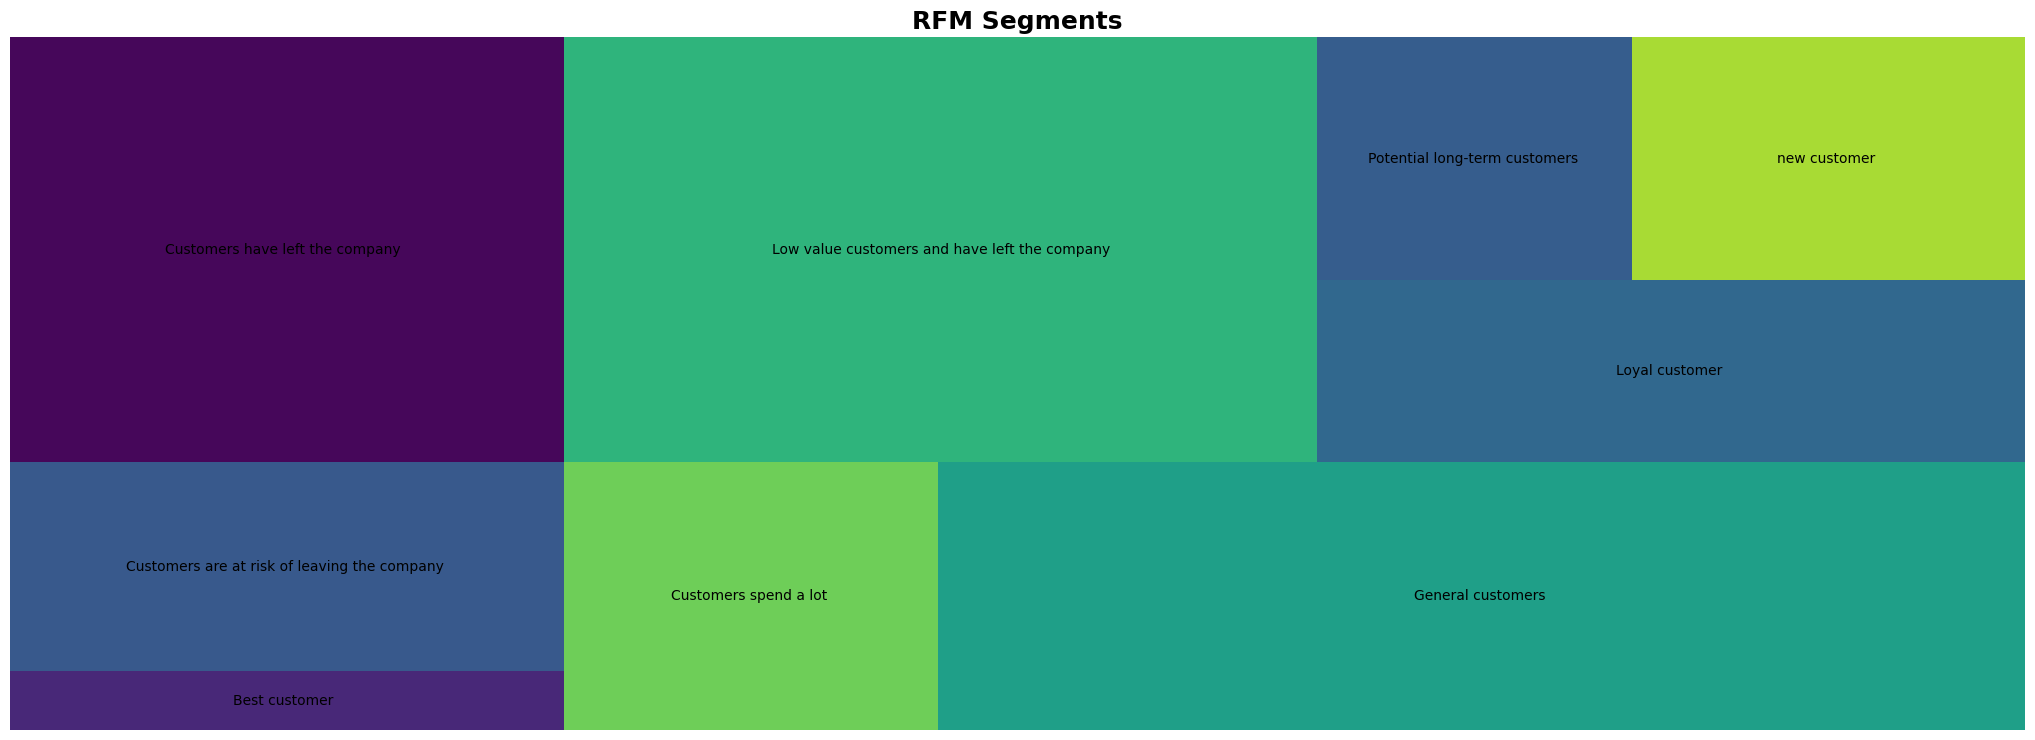

In [75]:
rfm_level_agg = customer.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(1)
print(rfm_level_agg)

rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(26, 9)
squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Best customer  ',
                     'Customers are at risk of leaving the company ',
                     'Customers have left the company  ',
                     'Customers spend a lot ',
                     'General customers ',
                     'Low value customers and have left the company',
                     'Loyal customer ',
                     'Potential long-term customers ',
                     'new customer '
                     ], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# Section 3: CLUSTERING WITH K-MEANS

In [42]:
customer = pd.read_excel(r"D:\UEL\RFM_US.xlsx")

3D Visualization

In [43]:
from mpl_toolkits.mplot3d import Axes3D
def Descartes(df, title):
  fig = plt.figure(figsize = (12,12))

  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xs = df["Recency"], ys = df["Frequency"], zs = df["Monetary"], color='red')
  ax.set_title(title)
  ax.set_xlabel("Recency")
  ax.set_ylabel("Frequency")
  ax.set_zlabel("Monetary")
  plt.show()

3D Visualization the dataset RFM

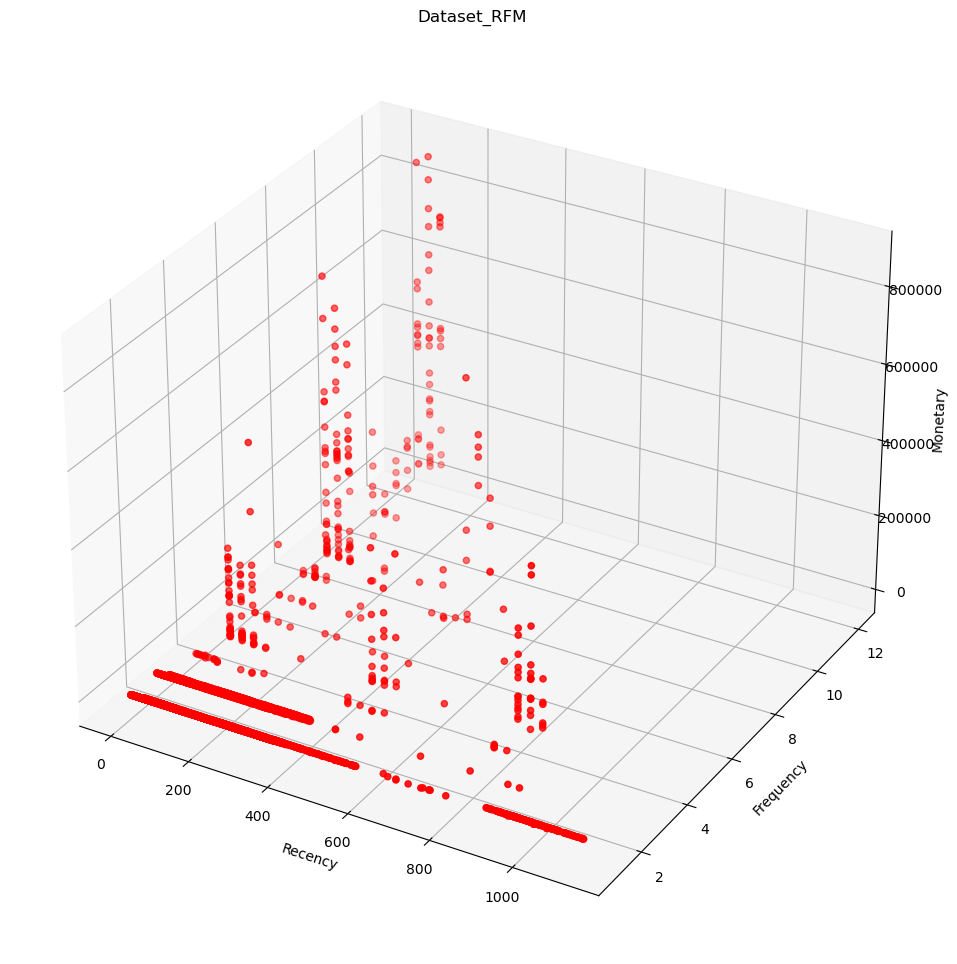

In [44]:
Descartes(customer, 'Dataset_RFM')

Compute the z score of each value in the sample, relative to the sample mean and standard deviation.

In [45]:
raw_dataRFM = customer.drop('CustomerID', axis=1)
# Z-Score
data_scaled = raw_dataRFM.apply(stats.zscore)

In [46]:
data_scaled.describe().astype('int32')

,Recency,Frequency,Monetary
count,8210,8210,8210
mean,0,0,0
std,1,1,1
min,-1,0,0
25%,0,0,0
50%,0,0,0
75%,0,0,0
max,5,7,17


In [47]:
data_scaled.head(10)

,Recency,Frequency,Monetary
0,0.869370,-0.346569,-0.157212
1,0.758972,-0.346569,-0.154876
2,-0.792407,-0.346569,-0.145076
3,0.735731,-0.346569,-0.157165
4,0.485883,-0.346569,-0.156710
5,-0.670388,-0.346569,-0.107773
6,1.095976,-0.346569,-0.145773
7,0.451021,-0.346569,-0.145004
8,-0.467024,0.396144,-0.093043
9,0.427779,-0.346569,-0.145004


Comparison of distribution of data before and after normalization by z-score method

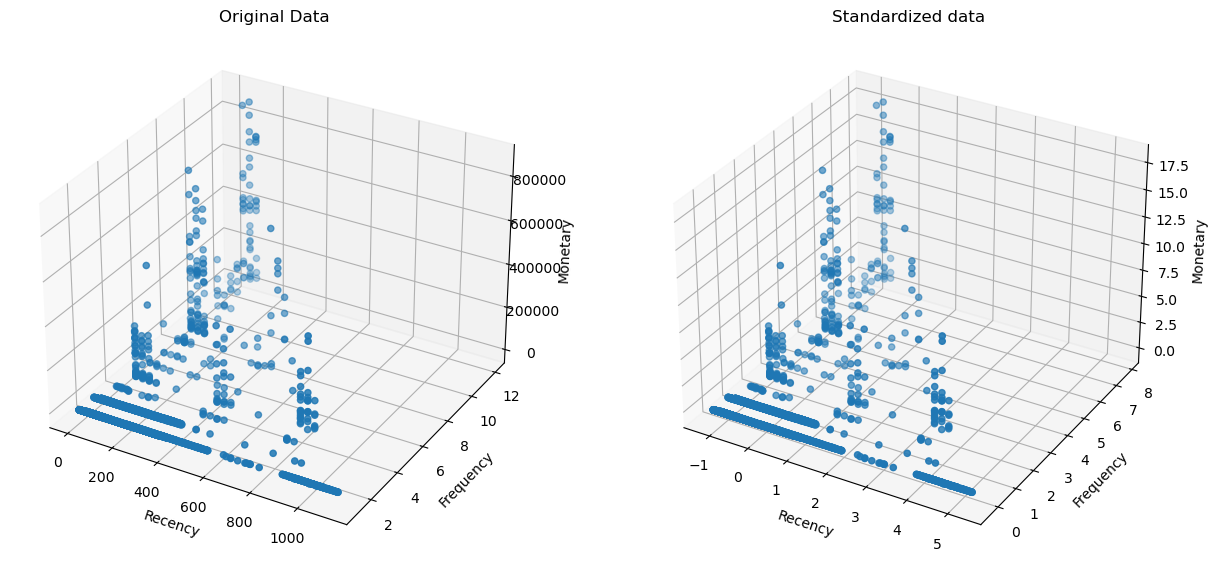

In [48]:
fig = plt.figure(1, [15, 9])

ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs = raw_dataRFM["Recency"], ys = raw_dataRFM["Frequency"], zs = raw_dataRFM["Monetary"])
ax.set_title("Original Data")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")


ax = fig.add_subplot(122, projection='3d')
ax.scatter(xs = data_scaled["Recency"], ys = data_scaled["Frequency"], zs = data_scaled["Monetary"])
ax.set_title("Standardized data")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")

plt.show()

Elbow

USING ELBOW TO FIND OPTIMAL NUMBER CLUSTERS

[14404.996220330082, 9647.223046075702, 6829.58029314529, 4557.46317878799, 3864.4467450559705, 3223.8220834871736, 2757.946230389545, 2402.573949975784, 2130.9742682910337]


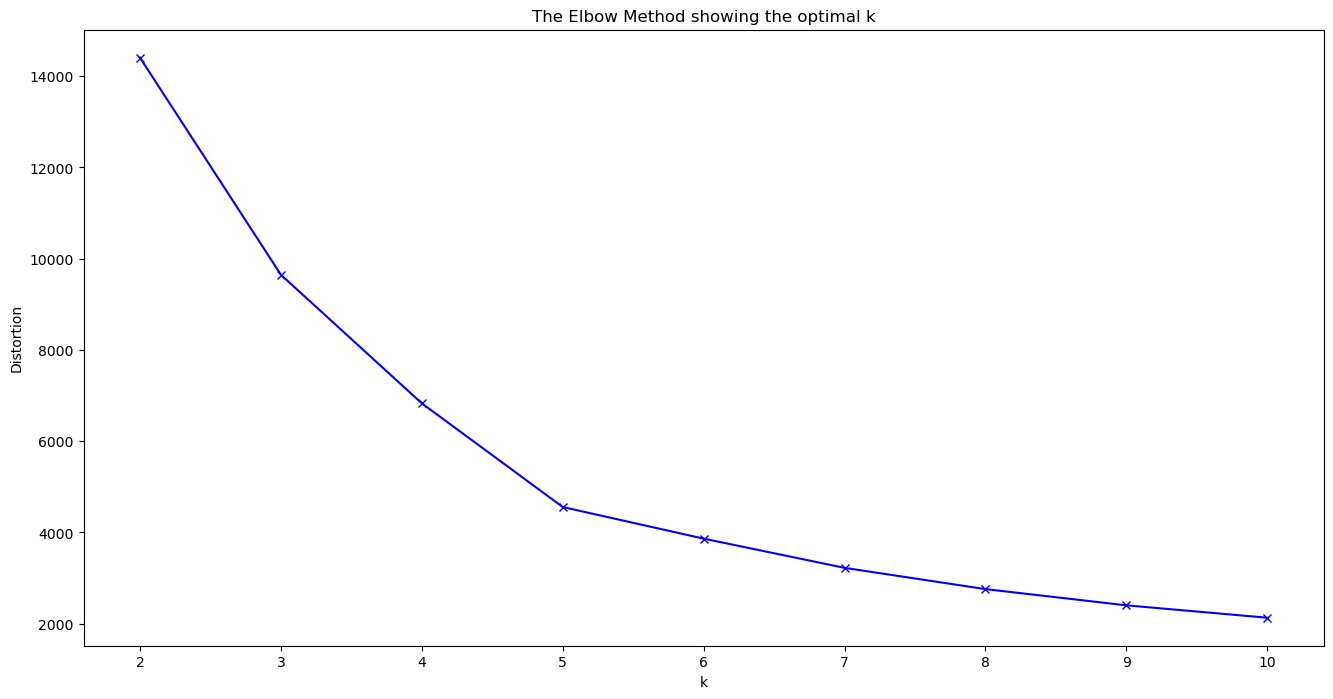

In [49]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)

    ssd.append(kmeans.inertia_)
print(ssd)
# plot the SSDs for each n_clusters
plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

IMPLEMENT K-MEANS ALGORITHM

In [50]:
# k=5
model = KMeans(n_clusters = 5, max_iter = 300)
model.fit(data_scaled)

KMeans(n_clusters=5)

3D Visualization the result

In [51]:
# assign the label
customer['Cluster_Id'] = model.labels_
customer.head(10)

,CustomerID,Recency,Frequency,Monetary,Cluster_Id
0,18569,357,1,4.99,2
1,27059,338,1,118.96,2
2,19897,71,1,596.96,0
3,27036,334,1,7.28,2
4,18546,291,1,29.48,2
5,17003,92,1,2416.45,0
6,21440,396,1,562.96,2
7,22768,285,1,600.46,2
8,15844,127,2,3134.95,0
9,22791,281,1,600.46,2


c:\Users\Admin\anaconda3\envs\FourCastNet_env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

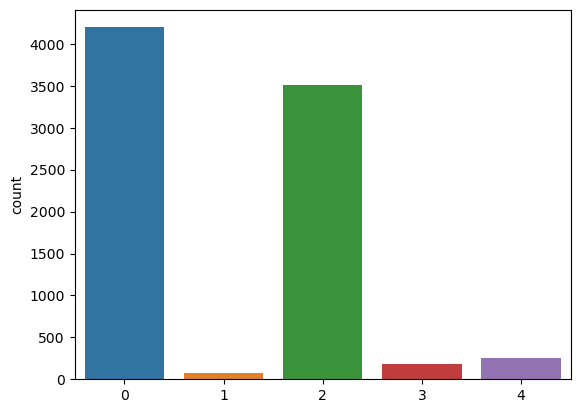

In [52]:
import seaborn as sns

sns.countplot(model.labels_)

In [53]:

import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(customer.Cluster_Id.unique()):

    PLOT.add_trace(go.Scatter3d(x = customer[customer.Cluster_Id == C]['Recency'],
                                y = customer[customer.Cluster_Id == C]['Frequency'],
                                z = customer[customer.Cluster_Id == C]['Monetary'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster ' + str(C)))


PLOT.update_layout(width = 1200, height = 1200, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'Frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

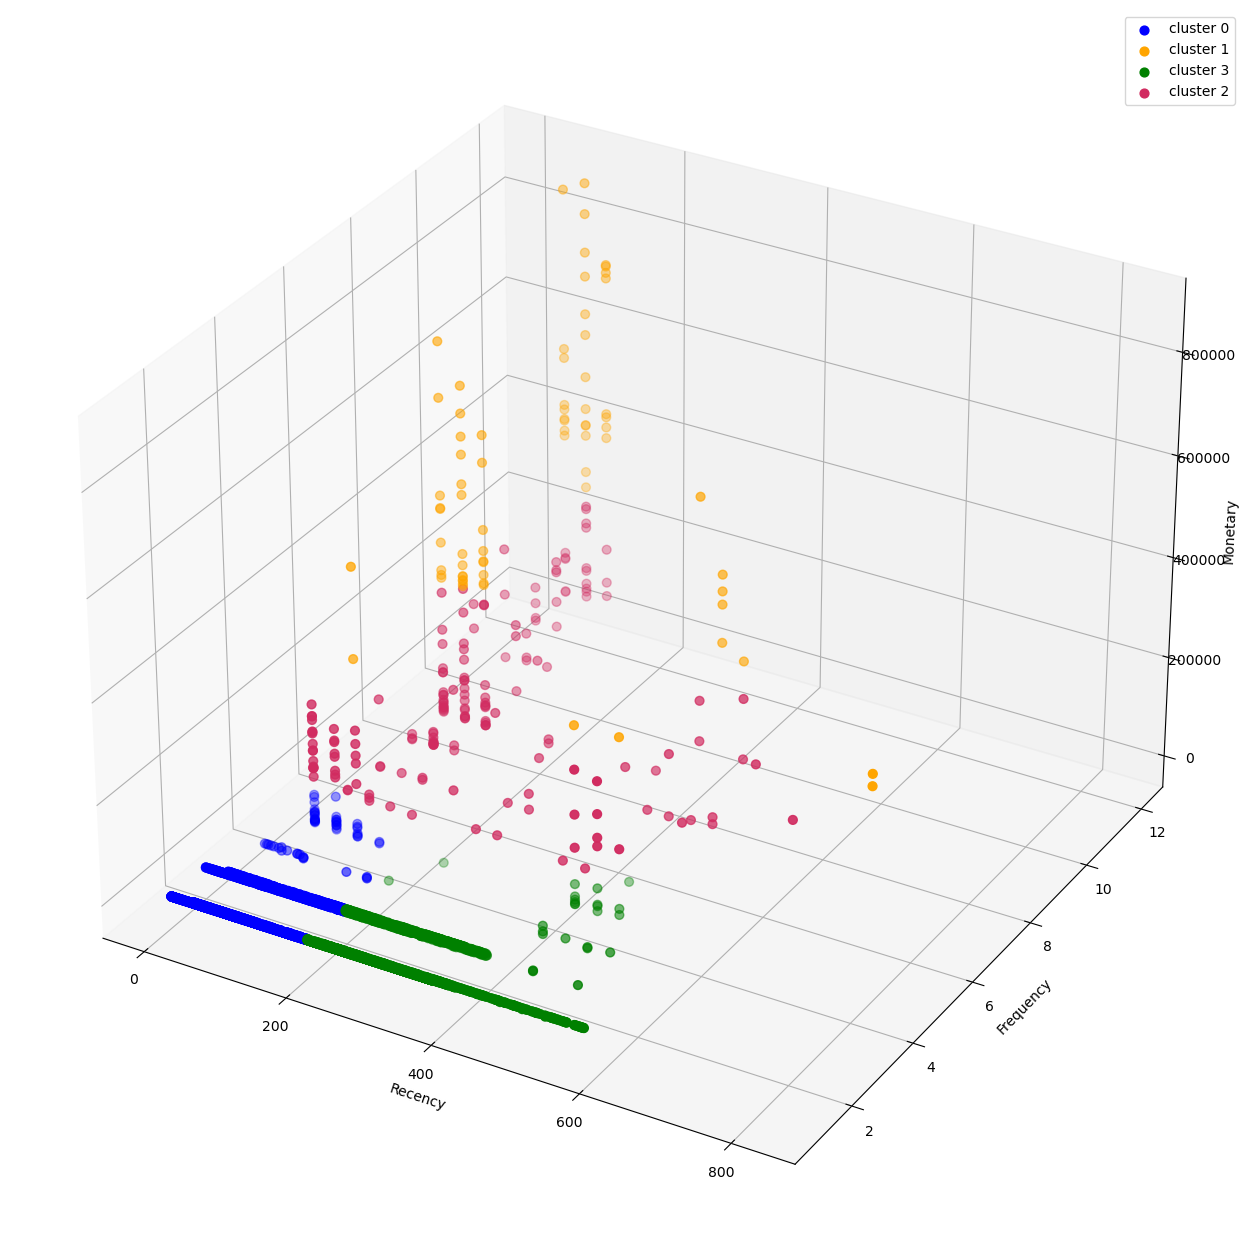

In [54]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(111, projection='3d')
df = np.array(raw_dataRFM)
ax.scatter(df[model.labels_ == 0,0],df[model.labels_ == 0,1],df[model.labels_ == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(df[model.labels_ == 1,0],df[model.labels_ == 1,1],df[model.labels_ == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(df[model.labels_ == 2,0],df[model.labels_ == 2,1],df[model.labels_ == 2,2], s = 40 , color = 'green', label = "cluster 3")
ax.scatter(df[model.labels_ == 3,0],df[model.labels_ == 3,1],df[model.labels_ == 3,2], s = 40 , color = '#D12B60', label = "cluster 2")

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.show()